# Nama : M. Rangga Yaqub Wijaya
# NIM  : 2109106104
# POSTTEST 7 Kecerdasan Buatan

### Import library

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

### Direktori folder dataset

In [3]:
DIR = 'animals'

### Implementasi augmentasi dataset, membuat data generator augmentasi

In [4]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

### Split dataset menjadi train dengan skala 80%

In [5]:
train_generator = datagen.flow_from_directory(
    DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 572 images belonging to 4 classes.


### Data generator untuk validation (tidak menggunakan augmentasi)

In [6]:
val_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

### Split dataset menjadi validation dengan skala 20%

In [7]:
validation_generator = val_datagen.flow_from_directory(
    DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 141 images belonging to 4 classes.


### Split dataset menjadi test untuk pengujian model, skala 100% dengan augmentasi

In [8]:
test_generator = datagen.flow_from_directory(
    DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
)

Found 713 images belonging to 4 classes.


### Deklarasi struktur model

In [9]:
model = Sequential([
    Conv2D(256, (3,3), activation='relu', input_shape=[150,150,3]),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

### Detail struktur model

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

### Kompilasi model dengan optimizer adam, loss categorical_crossentropy karena terdapat 4 kelas, dan metrics accuracy

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Deklarasi callback dengan ModelCheckpoint untuk memonitoring val_accuracy dan hanya menyimpan hasil model dengan train terbaik

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=0)

### Train Model dengan jumlah epochs 50

In [12]:
hasil = model.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=model_checkpoint, verbose=1)

Epoch 1/50
18/18 [==============================] - 61s 3s/step - loss: 1.4033 - accuracy: 0.2570 - val_loss: 1.3859 - val_accuracy: 0.2553
Epoch 2/50


C:\Kuliah\Semester5\Praktikum\KecerdasanBuatan\venv_jupyterlab\Anhar\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 55s 3s/step - loss: 1.3866 - accuracy: 0.2605 - val_loss: 1.3814 - val_accuracy: 0.2624
Epoch 3/50
18/18 [==============================] - 51s 3s/step - loss: 1.3792 - accuracy: 0.2692 - val_loss: 1.3598 - val_accuracy: 0.3191
Epoch 4/50
18/18 [==============================] - 51s 3s/step - loss: 1.3675 - accuracy: 0.2727 - val_loss: 1.3100 - val_accuracy: 0.2979
Epoch 5/50
18/18 [==============================] - 52s 3s/step - loss: 1.3324 - accuracy: 0.3304 - val_loss: 1.2776 - val_accuracy: 0.3404
Epoch 6/50
18/18 [==============================] - 50s 3s/step - loss: 1.2674 - accuracy: 0.4038 - val_loss: 1.1355 - val_accuracy: 0.4752
Epoch 7/50
18/18 [==============================] - 50s 3s/step - loss: 1.2141 - accuracy: 0.4213 - val_loss: 1.2388 - val_accuracy: 0.4184
Epoch 8/50
18/18 [==============================] - 52s 3s/step - loss: 1.1742 - accuracy: 0.4545 - val_loss: 1.0679 - val_accuracy: 0.5319
Epoch 9/50
18/18 [=============

### Evaluasi model menggunakan test_generator yang sudah displit tadi
### Mendapatkan hasil accuracy 0.747545599937439 dan loss 0.6038784384727478

In [21]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

23/23 [==============================] - 26s 1s/step - loss: 0.5885 - accuracy: 0.7630
Test accuracy: 0.7629733681678772
Test loss: 0.5884934067726135


### Visualisasi grafik accuracy dan val_accuracy model pada saat training sesuai dengan jumlah epochsnya

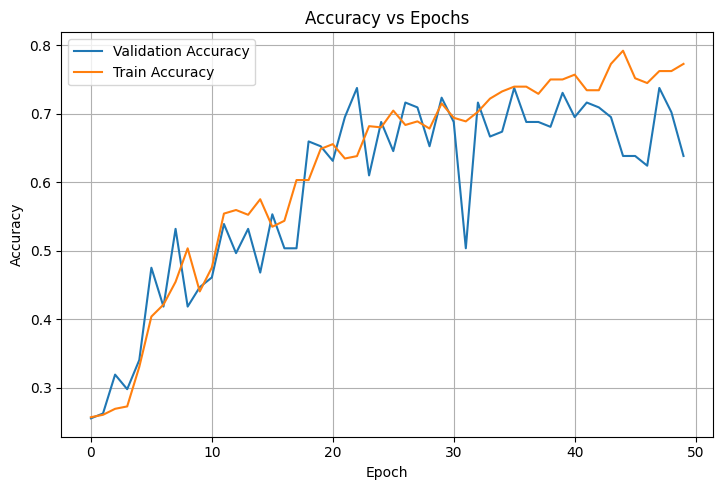

In [19]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(hasil.history['val_accuracy'], label='Validation Accuracy')
plt.plot(hasil.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualisasi grafik loss dan val_loss model pada saat training sesuai dengan jumlah epochsnya

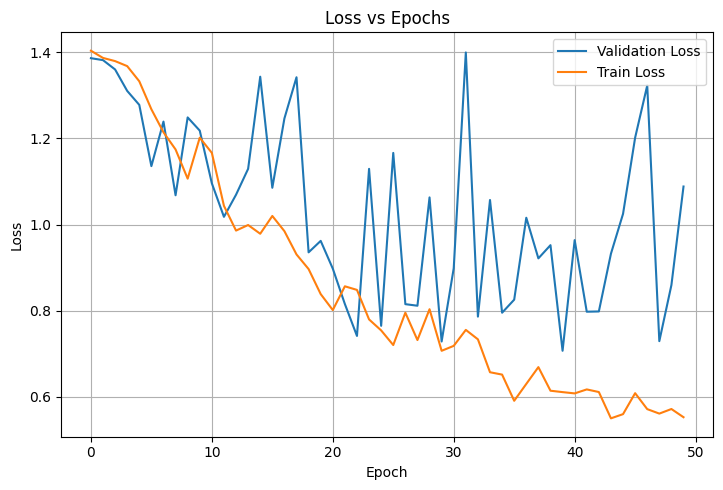

In [20]:
# Buat grafik Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(hasil.history['val_loss'], label='Validation Loss')
plt.plot(hasil.history['loss'], label='Train Loss')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Dataset : [](https://www.kaggle.com/datasets/faldoae/padangfood/data)